World Population Exploratory Data Analysis (EDA)
================================================

Dataset Overview
----------------

The dataset provides population data for each country from 1970 to 2022, organized by decade. It includes additional information such as area, growth rate, continent, capital, and world population percentage.

Steps Performed
---------------

1. **Set Decimal Points: To format numbers to two decimal points:**  

    Code - pd.set\_option('display.float\_format', lambda x: '%.2f' % x)
    <br>
2.  **Basic Data Overview:**
    
    *   **Check for Duplicates:** df\[df.duplicated()\]
        
    *   **Statistical Summary:** df.describe()
        
    *   **Number of Null Values for Each Column:** df.isnull().sum()
        
    *   **Number of Unique Values for Each Column:** df.nunique()
        
    *   **Number of Duplicate Rows:** df\[df.duplicated()\]
        <br>
3.  **Population Analysis:**
    
    *   **Top 10 Smallest Countries by 2022 Population:** df.sort\_values(by='2022 Population').head(10)
        
    *   **Top 10 Largest Countries by 2022 Population:** df.sort\_values(by='2022 Population', ascending=False).head(10)
        <br>
4.  **Correlation Analysis:**
    
    *   **Correlation Matrix:** df.select\_dtypes(include=\['int', 'float'\]).corr()
        
    *   **Heatmap Visualization:** sns.heatmap(df.select\_dtypes(include=\['int', 'float'\]).corr(), annot=True)
        <br>
5.  **Continental Analysis:**
    
    *   **Mean Population and Growth of Continents:** df.groupby(\['Continent'\]).mean(numeric\_only=True)
        
    *   **Total Population Contribution by Continent:** df.groupby(\['Continent'\])\['World Population Percentage'\].sum().sort\_values(ascending=False)
        
    *   **Comparison of Area and World Population Percentage:** The analysis reveals that while generally larger areas contribute to a higher population percentage, Europe and North America deviate from this trend. North America, despite having a larger area than Europe, contributes less to the global population percentage: <br>
    df.groupby(\['Continent'\])\[\['World Population Percentage', 'Area (km²)'\]\].sum().sort\_values(by=\['Area (km²)'\], ascending=False)
        <br>
6.  **Population Growth Over Time:**
    
    *   **Line Chart of Population Growth by Continent:** The chart shows that Asia's population has consistently been high compared to other continents, with significant growth observed between 1990 and 2000. Post-2000, Asia's population growth has continued on an upward trajectory:<br> 
    df2 = df.groupby('Continent')\[\['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population', '2022 Population'\]\].sum().sort\_values(by='2022 Population', ascending=False)
        <br>
7.  **Top 20 Countries Analysis:**
    
    *   **Rapid Growth Observation:** Among the top 20 countries, India has shown rapid population growth over the last 2-3 decades, significantly influencing Asia's population growth from 1990 onwards.
        <br>
8.  **Outlier Analysis:**
    
    *   **Box Plot Creation:** A box plot was created to identify outliers. In population data, outliers are common due to various influencing factors. While outliers are important to note, they may not always indicate data issues, as seen in revenue data where a single company earning significantly more than others might suggest data anomalies or insights which should be studied and understood.
        

Insights
--------

*   **Population Growth Trends:** Asia's population growth has been consistently high, with a notable surge between 1990 and 2000. India plays a crucial role in this trend.
    
*   **Area vs. World Population Percentage Comparison:** Generally, larger areas have a higher contribution to the world population. However, Europe and North America deviate from this trend. Despite North America having more land area than Europe, it contributes less to the global population percentage.
    
*   **Outliers in Population Data:** While outliers are expected in population data, they should be interpreted with caution, as they can be influenced by numerous factors rather than indicating data errors.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Data science\Portfolio Projects\World Population EDA\world_population.csv")
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230.0,33753499.0,28189672.0,19542982.0,10694796.0,12486631.0,10752971.0,652230.0,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849.0,2882481.0,2913399.0,3182021.0,3295066.0,2941651.0,2324731.0,28748.0,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666.0,39543154.0,35856344.0,30774621.0,25518074.0,18739378.0,13795915.0,2381741.0,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189.0,51368.0,54849.0,58230.0,47818.0,32886.0,27075.0,199.0,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700.0,71746.0,71519.0,66097.0,53569.0,35611.0,19860.0,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.0,11655.0,12182.0,13142.0,14723.0,13454.0,11315.0,9377.0,142.0,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.0,556048.0,491824.0,413296.0,270375.0,178529.0,116775.0,76371.0,266000.0,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.0,32284046.0,28516545.0,24743946.0,18628700.0,13375121.0,9204938.0,6843607.0,527968.0,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.0,18927715.0,NaN,13792086.0,9891136.0,7686401.0,5720438.0,4281671.0,752612.0,26.5976,1.0280,0.25


In [4]:
pd.set_option('display.float_format',lambda x: '%.2f' %x)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [6]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
mean,117.50,34632250.88,33600710.95,32066004.16,30270164.48,26840495.26,19330463.93,16282884.78,15866499.13,581663.75,456.81,1.01,0.43
std,67.69,137889172.44,135873196.61,131507146.34,126074183.54,113352454.57,81309624.96,69345465.54,68355859.75,1769133.06,2083.74,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,406471.00,394295.00,382726.50,329470.00,261928.00,223752.00,145880.50,2567.25,36.60,1.00,0.01
50%,117.50,5762857.00,5456681.00,5244415.00,4889741.00,4491202.00,3785847.00,3135123.00,2511718.00,77141.00,95.35,1.01,0.07
75%,175.75,22653719.00,21522626.00,19730853.75,16825852.50,15625467.00,11882762.00,9817257.00,8817329.00,414643.25,236.88,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


In [7]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [8]:
df.nunique()

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

In [9]:
df[df.duplicated()]

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage


In [10]:
df.sort_values(by='2022 Population').head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
226,234,VAT,Vatican City,Vatican City,Europe,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,510.00,1.00,0.00
209,233,TKL,Tokelau,Nukunonu,Oceania,1871.00,1827.00,1454.00,1367.00,1666.00,1669.00,1647.00,1714.00,12.00,155.92,1.01,0.00
150,232,NIU,Niue,Alofi,Oceania,1934.00,1942.00,1847.00,1812.00,2074.00,2533.00,3637.00,5185.00,260.00,7.44,1.00,0.00
64,231,FLK,Falkland Islands,Stanley,South America,3780.00,3747.00,3408.00,3187.00,3080.00,2332.00,2240.00,2274.00,12173.00,0.31,1.00,0.00
137,230,MSR,Montserrat,Brades,North America,4390.00,4500.00,5059.00,4938.00,5138.00,10805.00,11452.00,11402.00,102.00,43.04,0.99,0.00
177,229,SPM,Saint Pierre and Miquelon,Saint-Pierre,North America,5862.00,5906.00,5978.00,6052.00,6274.00,6324.00,6106.00,5537.00,242.00,24.22,1.00,0.00
173,228,BLM,Saint Barthelemy,Gustavia,North America,10967.00,10681.00,9643.00,8988.00,7082.00,5168.00,2983.00,2417.00,21.00,522.24,1.01,0.00
216,227,TUV,Tuvalu,Funafuti,Oceania,11312.00,11069.00,10877.00,10550.00,9638.00,9182.00,7731.00,5814.00,26.00,435.08,1.01,0.00
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.00,11655.00,12182.00,13142.00,14723.00,13454.00,11315.00,9377.00,142.00,81.49,1.00,0.00
142,225,NRU,Nauru,Yaren,Oceania,12668.00,12315.00,11185.00,10241.00,10377.00,9598.00,7635.00,6663.00,21.00,603.24,1.01,0.00


In [11]:
df.sort_values(by='2022 Population',ascending=False).head(10)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,9706961.00,146.89,1.00,17.88
92,2,IND,India,New Delhi,Asia,1417173173.00,1396387127.00,1322866505.00,1240613620.00,1059633675.00,NaN,NaN,557501301.00,3287590.00,431.07,1.01,17.77
221,3,USA,United States,"Washington, D.C.",North America,338289857.00,335942003.00,324607776.00,311182845.00,282398554.00,248083732.00,223140018.00,200328340.00,9372610.00,36.09,1.00,4.24
93,4,IDN,Indonesia,Jakarta,Asia,275501339.00,271857970.00,259091970.00,244016173.00,214072421.00,182159874.00,148177096.00,115228394.00,1904569.00,144.65,1.01,3.45
156,5,PAK,Pakistan,Islamabad,Asia,235824862.00,227196741.00,210969298.00,194454498.00,154369924.00,115414069.00,80624057.00,59290872.00,881912.00,267.40,1.02,2.96
149,6,NGA,Nigeria,Abuja,Africa,218541212.00,208327405.00,183995785.00,160952853.00,122851984.00,95214257.00,72951439.00,55569264.00,923768.00,236.58,1.02,2.74
27,7,BRA,Brazil,Brasilia,South America,215313498.00,213196304.00,205188205.00,196353492.00,175873720.00,150706446.00,122288383.00,96369875.00,8515767.00,25.28,1.00,2.70
16,8,BGD,Bangladesh,Dhaka,Asia,171186372.00,167420951.00,157830000.00,148391139.00,129193327.00,107147651.00,83929765.00,67541860.00,147570.00,1160.04,1.01,2.15
171,9,RUS,Russia,Moscow,Europe,144713314.00,145617329.00,144668389.00,143242599.00,146844839.00,148005704.00,138257420.00,130093010.00,17098242.00,8.46,1.00,1.81
131,10,MEX,Mexico,Mexico City,North America,127504125.00,125998302.00,120149897.00,112532401.00,97873442.00,81720428.00,67705186.00,50289306.00,1964375.00,64.91,1.01,1.60


In [12]:
df.select_dtypes(include=['int','float']).corr()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.00,-0.36,-0.36,-0.35,-0.35,-0.34,-0.33,-0.33,-0.34,-0.38,0.13,-0.22,-0.36
2022 Population,-0.36,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.97,0.45,-0.03,-0.02,1.00
2020 Population,-0.36,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.45,-0.03,-0.03,1.00
2015 Population,-0.35,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.46,-0.03,-0.03,1.00
2010 Population,-0.35,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.46,-0.03,-0.04,1.00
2000 Population,-0.34,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.47,-0.03,-0.05,0.99
1990 Population,-0.33,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.52,-0.03,-0.07,0.99
1980 Population,-0.33,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,0.53,-0.03,-0.08,0.99
1970 Population,-0.34,0.97,0.98,0.98,0.98,0.99,1.00,1.00,1.00,0.51,-0.03,-0.08,0.97
Area (km²),-0.38,0.45,0.45,0.46,0.46,0.47,0.52,0.53,0.51,1.00,-0.06,-0.01,0.45


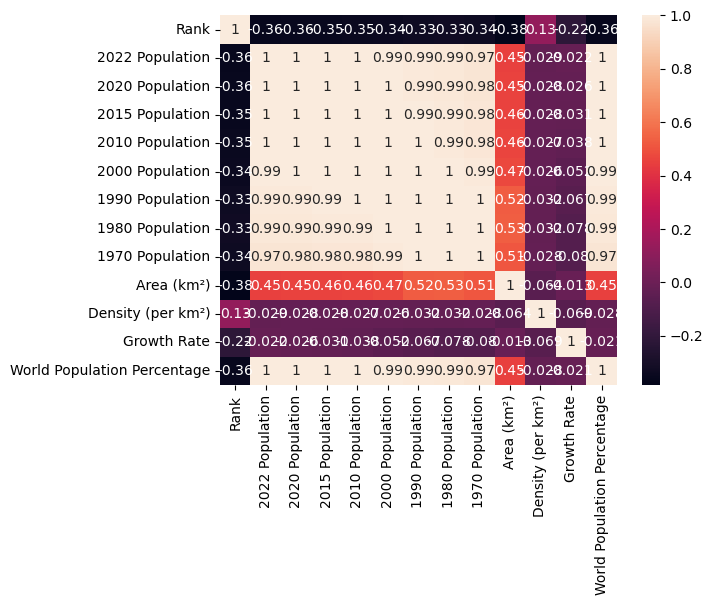

In [13]:
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True)
plt.rcParams['figure.figsize'] = (20,7)

In [14]:
df.groupby(['Continent']).mean(numeric_only=True)

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Africa,92.16,25455879.68,23871435.26,21419703.57,18898197.31,14598365.95,11376964.52,8586031.98,6567175.27,537879.30,126.41,1.02,0.31
Asia,77.56,96327387.31,94955134.37,89165003.64,89087770.00,80580835.11,48639995.33,40278333.33,43839877.83,642762.82,1025.02,1.01,1.18
Europe,124.50,15055371.82,14915843.92,15027454.12,14712278.68,14817685.71,14785203.94,14200004.52,13118479.82,460208.22,663.32,1.00,0.19
North America,160.93,15007403.40,14855914.82,14259596.25,13568016.28,12151739.60,10531660.62,9207334.03,7885865.15,606104.45,272.49,1.00,0.19
Oceania,188.52,2046386.32,1910148.96,1756664.48,1613163.65,1357512.09,1162774.87,996532.17,846968.26,370220.91,132.54,1.01,0.02
South America,97.57,31201186.29,30823574.50,29509599.71,26789395.54,25015888.69,21224743.93,17270643.29,13781939.71,1301302.85,20.97,1.01,0.39


In [15]:
df.groupby(['Continent'])['World Population Percentage'].sum().sort_values(ascending=False)

Continent
Asia            59.19
Africa          17.87
Europe           9.33
North America    7.51
South America    5.48
Oceania          0.55
Name: World Population Percentage, dtype: float64

In [16]:
df.groupby(['Continent'])[['World Population Percentage','Area (km²)']].sum().sort_values(by=['Area (km²)'],ascending=False)

,World Population Percentage,Area (km²)
Continent,,
Asia,59.19,32138141.00
Africa,17.87,30121241.00
North America,7.51,24244178.00
Europe,9.33,23010411.00
South America,5.48,16916937.00
Oceania,0.55,8515081.00


In [17]:
df.columns

Index(['Rank', 'CCA3', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage'],
      dtype='object')

In [18]:
df2 = df.groupby('Continent')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].sum().sort_values(by='2022 Population',ascending=False)

df2

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Asia,2104314136.00,1933360000.00,2334719776.00,3706718415.00,4187125190.00,4458250182.00,4652801584.00,4720041978.00
Africa,361194640.00,480817791.00,637110013.00,817508493.00,1020502655.00,1156663993.00,1360671810.00,1425529262.00
Europe,655923991.00,681600217.00,709689789.00,726066600.00,735613934.00,736345252.00,745792196.00,737713219.00
North America,315434606.00,368293361.00,421266425.00,486069584.00,542720651.00,570383850.00,594236593.00,600296136.00
South America,192947156.00,241789006.00,297146415.00,325206553.00,348262142.00,413134396.00,431530043.00,436816608.00
Oceania,19480270.00,22920240.00,26743822.00,31222778.00,37102764.00,40403283.00,43933426.00,45020499.00


In [19]:
df2.transpose()

Continent,Asia,Africa,Europe,North America,South America,Oceania
1970 Population,2104314136.00,361194640.00,655923991.00,315434606.00,192947156.00,19480270.00
1980 Population,1933360000.00,480817791.00,681600217.00,368293361.00,241789006.00,22920240.00
1990 Population,2334719776.00,637110013.00,709689789.00,421266425.00,297146415.00,26743822.00
2000 Population,3706718415.00,817508493.00,726066600.00,486069584.00,325206553.00,31222778.00
2010 Population,4187125190.00,1020502655.00,735613934.00,542720651.00,348262142.00,37102764.00
2015 Population,4458250182.00,1156663993.00,736345252.00,570383850.00,413134396.00,40403283.00
2020 Population,4652801584.00,1360671810.00,745792196.00,594236593.00,431530043.00,43933426.00
2022 Population,4720041978.00,1425529262.00,737713219.00,600296136.00,436816608.00,45020499.00


<Axes: >

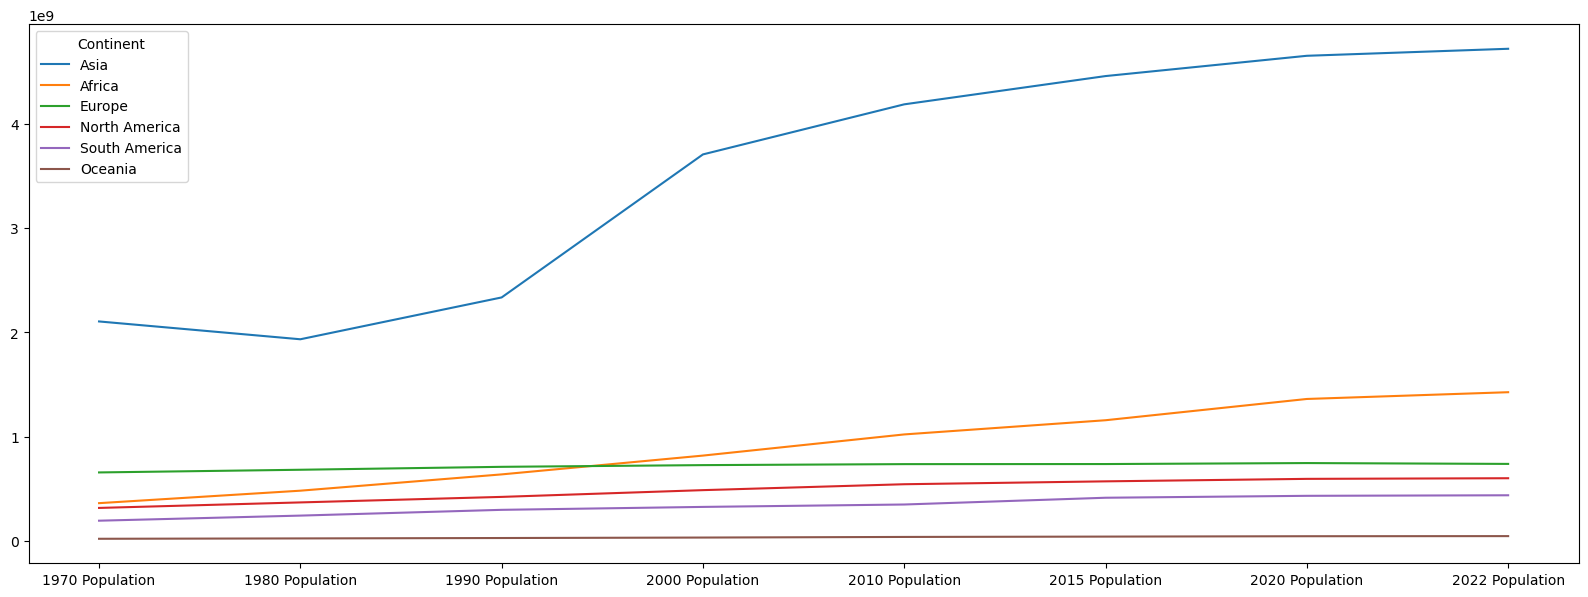

In [20]:
df2.transpose().plot()

<Axes: >

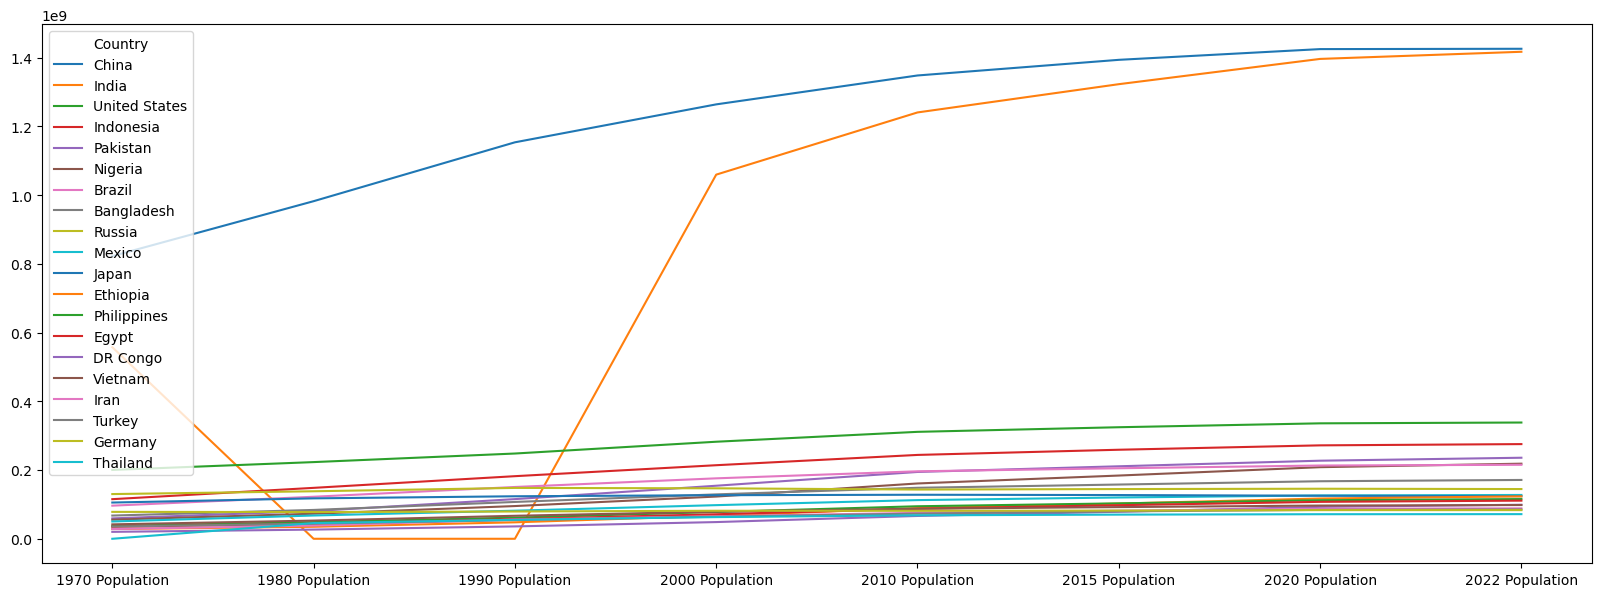

In [21]:
df3 = df.groupby('Country')[['1970 Population',
       '1980 Population', '1990 Population', '2000 Population',
       '2010 Population', '2015 Population', '2020 Population',
       '2022 Population']].sum().sort_values(by='2022 Population',ascending=False).head(20)

df3.transpose().plot()

<Axes: >

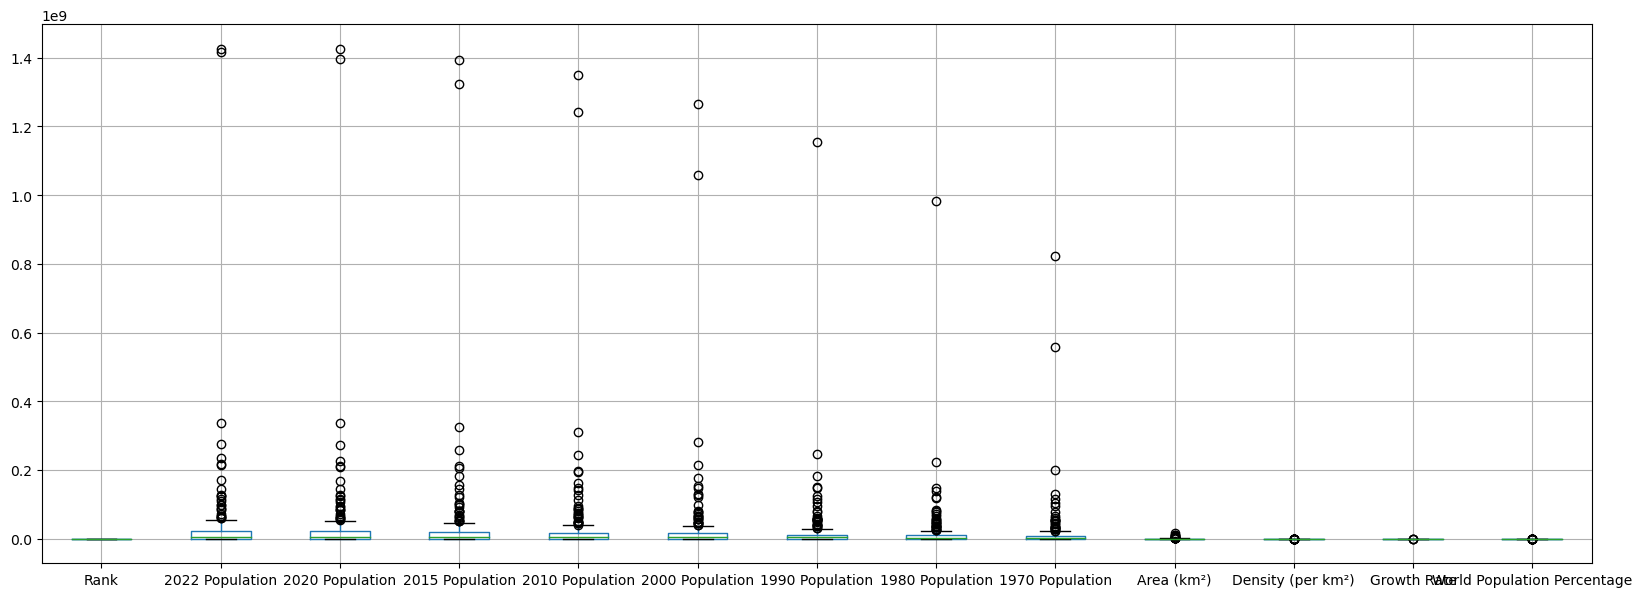

In [22]:
df.boxplot()